In [55]:
# Reference = https://github.com/JosephMagiya/Clustering-GPS-Co-ordinates--Forming-Regions./blob/master/Clustering-GPS-Co-ordinates--Forming-Regions.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import xlrd
%matplotlib notebook

In [2]:
emp_data = pd.read_excel('Data/filtered_employee.xlsx')
emp_data.head(5)

,id,Street,City,State,ZipCode,BUILDING_NAME,DEPT_ID,DEPT_NAME,Lat/Long,Latitude,Longitude
0,1415270,1238 W Sonora,Tucson,AZ,85745,Life Sciences South,417,Molecular and Cellular Biology,"28.4586667,-111.2221667",28.458667,-111.222167
1,1982269,4650 E Juarez,Tucson,AZ,85711,Highland Commons,9601,Disability Resource Center,"31.6262753,-106.3736945",31.626275,-106.373694
2,1824217,9419 E Woolly Butterfly Ct,Corona de Tucson,AZ,85641,Sierra Vista Campus,2910,College of Applied Science and Technology,"31.930968813633935,-110.79131836515772",31.930969,-110.791318
3,1978845,9351 E Desert Milkweed Ct,Corona de Tucson,AZ,85641,University Services Building,7702,Financial Services Office-Financial Management,"31.93206283618629,-110.79207371442413",31.932063,-110.792074
4,1852429,49 E Forrest Feezor St,Corona De Tucson,AZ,85641,Gould-Simpson,1205,Geosciences,"31.950882922771964,-110.76953303729253",31.950883,-110.769533


In [14]:
X = emp_data.loc[:,['id','Latitude','Longitude']]
X.head(5)

,id,Latitude,Longitude
0,1415270,28.458667,-111.222167
1,1982269,31.626275,-106.373694
2,1824217,31.930969,-110.791318
3,1978845,31.932063,-110.792074
4,1852429,31.950883,-110.769533


In [10]:
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = emp_data[['Latitude']]
X_axis = emp_data[['Longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

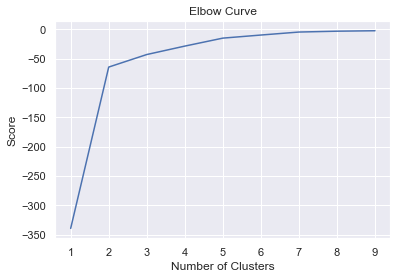

In [11]:
# Elbow Plot
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

In [37]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering. # Compute k-means clustering.

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

print('Centers: {0}'.format(centers))

labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
# print (X)
#X.head(10)

Centers: [[  32.24777219 -110.92672456]
 [  35.8722358    14.5261809 ]
 [  39.23427     -94.724985  ]
 [  37.349099    -80.8646294 ]
 [  34.67120034 -116.40650608]]
           id   Latitude   Longitude  cluster_label
0     1415270  28.458667 -111.222167              0
1     1982269  31.626275 -106.373694              0
2     1824217  31.930969 -110.791318              0
3     1978845  31.932063 -110.792074              0
4     1852429  31.950883 -110.769533              0
...       ...        ...         ...            ...
6471  1745302  38.833654  -77.641816              3
6472  1540891  39.234270  -94.724985              2
6473  1393036  39.234270  -94.724985              2
6474  1396824  39.234270  -94.724985              2
6475  1867717  39.234270  -94.724985              2

[6476 rows x 4 columns]


<IPython.core.display.Javascript object>


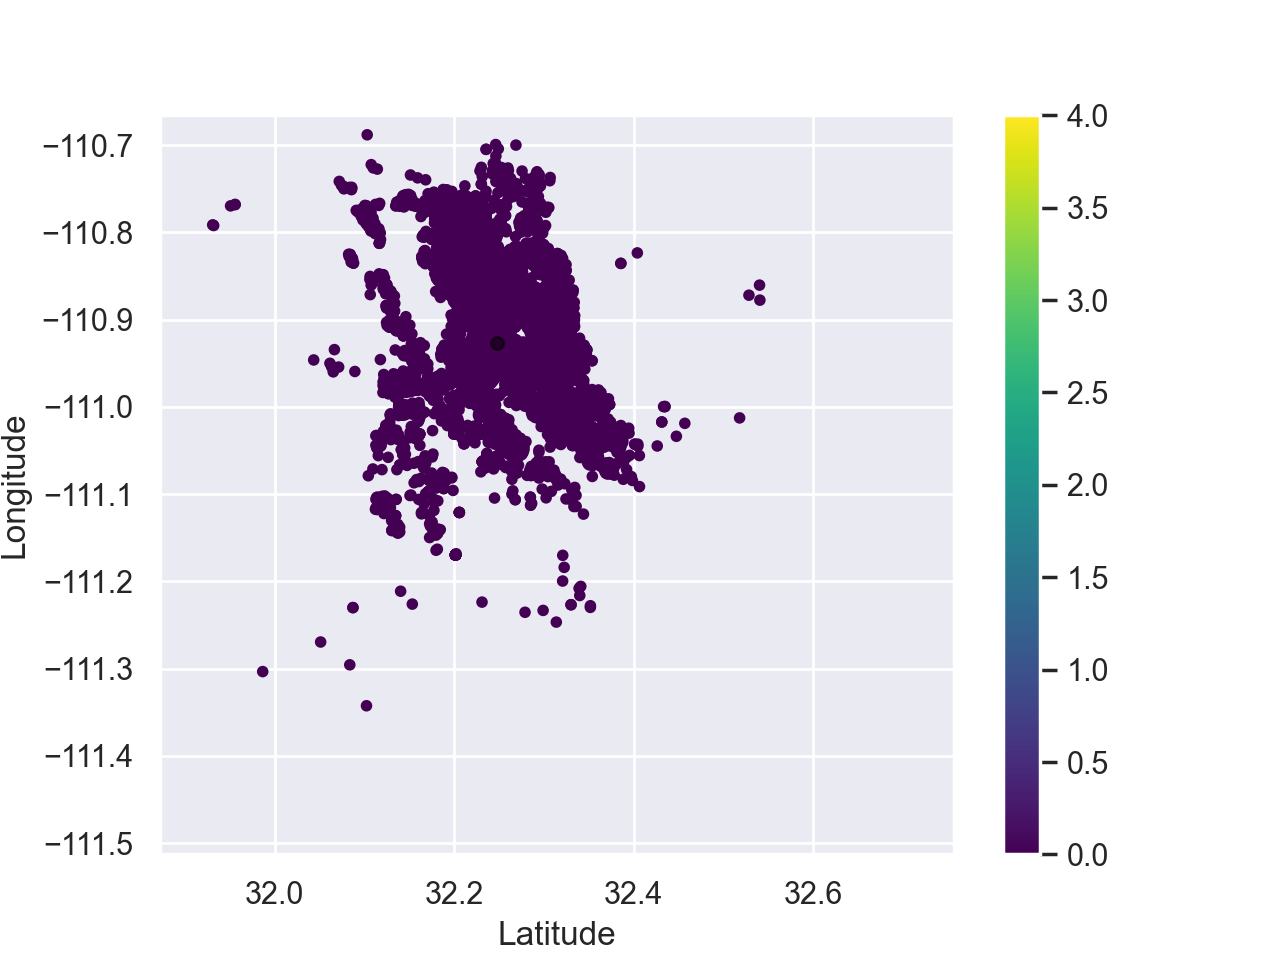

In [56]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c = labels, s = 10, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=0.5)

In [57]:
emp_data.head(5)

,id,Street,City,State,ZipCode,BUILDING_NAME,DEPT_ID,DEPT_NAME,Lat/Long,Latitude,Longitude
0,1415270,1238 W Sonora,Tucson,AZ,85745,Life Sciences South,417,Molecular and Cellular Biology,"28.4586667,-111.2221667",28.458667,-111.222167
1,1982269,4650 E Juarez,Tucson,AZ,85711,Highland Commons,9601,Disability Resource Center,"31.6262753,-106.3736945",31.626275,-106.373694
2,1824217,9419 E Woolly Butterfly Ct,Corona de Tucson,AZ,85641,Sierra Vista Campus,2910,College of Applied Science and Technology,"31.930968813633935,-110.79131836515772",31.930969,-110.791318
3,1978845,9351 E Desert Milkweed Ct,Corona de Tucson,AZ,85641,University Services Building,7702,Financial Services Office-Financial Management,"31.93206283618629,-110.79207371442413",31.932063,-110.792074
4,1852429,49 E Forrest Feezor St,Corona De Tucson,AZ,85641,Gould-Simpson,1205,Geosciences,"31.950882922771964,-110.76953303729253",31.950883,-110.769533


In [58]:
X.head(5)

,id,Latitude,Longitude,cluster_label
0,1415270,28.458667,-111.222167,0
1,1982269,31.626275,-106.373694,0
2,1824217,31.930969,-110.791318,0
3,1978845,31.932063,-110.792074,0
4,1852429,31.950883,-110.769533,0


In [59]:
X = X[['id','cluster_label']]
X.head(5)

,id,cluster_label
0,1415270,0
1,1982269,0
2,1824217,0
3,1978845,0
4,1852429,0


In [61]:
# Merging cluster label with the original data
clustered_data = emp_data.merge(X, left_on='id', right_on='id')
clustered_data.head(5)

,id,Street,City,State,ZipCode,BUILDING_NAME,DEPT_ID,DEPT_NAME,Lat/Long,Latitude,Longitude,cluster_label
0,1415270,1238 W Sonora,Tucson,AZ,85745,Life Sciences South,417,Molecular and Cellular Biology,"28.4586667,-111.2221667",28.458667,-111.222167,0
1,1982269,4650 E Juarez,Tucson,AZ,85711,Highland Commons,9601,Disability Resource Center,"31.6262753,-106.3736945",31.626275,-106.373694,0
2,1824217,9419 E Woolly Butterfly Ct,Corona de Tucson,AZ,85641,Sierra Vista Campus,2910,College of Applied Science and Technology,"31.930968813633935,-110.79131836515772",31.930969,-110.791318,0
3,1978845,9351 E Desert Milkweed Ct,Corona de Tucson,AZ,85641,University Services Building,7702,Financial Services Office-Financial Management,"31.93206283618629,-110.79207371442413",31.932063,-110.792074,0
4,1852429,49 E Forrest Feezor St,Corona De Tucson,AZ,85641,Gould-Simpson,1205,Geosciences,"31.950882922771964,-110.76953303729253",31.950883,-110.769533,0


In [62]:
centers = kmeans.cluster_centers_
print(centers)

[[  32.24777219 -110.92672456]
 [  35.8722358    14.5261809 ]
 [  39.23427     -94.724985  ]
 [  37.349099    -80.8646294 ]
 [  34.67120034 -116.40650608]]
